# **Algoritmo e Estrutura de Dados 2**


*   Gabriel Florêncio de Almeida
*   Mariana Costa Cavalcante Melo





# Instalação e Importação das Bibliotecas

In [ ]:
!pip install nxviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import nxviz
import pandas as pd
import nxviz as nv
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


#Lendo e armazenando o arquivo csv

O arquivo.csv contém o conteúdo usado nesse trabalho, que é o conjunto de dados sobre a aviação brasileira. Logo após temos 5 exemplos desses dados e suas especificações 

In [ ]:
data = pd.read_csv('airports.csv')
#for value in data['origin_airport_region']:
 #   print(value)
# Remover linhas com valores NaN ou vazios
print(data.tail(5))


      code                   name state   region  \
1078  FASU                   SACE   NaN      NaN   
1079  KNKX  SAN DIEGO, CALIFORNIA   NaN      NaN   
1080  SNLO           SÃO LOURENÇO    MG  SUDESTE   
1081  FZAA               KINSHASA   NaN      NaN   
1082  KHDO           HONDO, TEXAS   NaN      NaN   

                             country         continent Código OACI  \
1078                   ÁFRICA DO SUL            ÁFRICA         NaN   
1079       ESTADOS UNIDOS DA AMÉRICA  AMÉRICA DO NORTE         NaN   
1080                          BRASIL    AMÉRICA DO SUL         NaN   
1081  REPÚBLICA DEMOCRÁTICA DO CONGO            ÁFRICA         NaN   
1082       ESTADOS UNIDOS DA AMÉRICA  AMÉRICA DO NORTE         NaN   

            lat_geo_point        lon_geo_point  
1078  -25.956899642944336   29.211700439453125  
1079          32.86840057         -117.1429977  
1080  -22.090900421142578  -45.044498443603516  
1081             -4.38575              15.4446  
1082       29.3595008

In [ ]:
print(data.columns)

Index(['code', 'name', 'state', 'region', 'country', 'continent',
       'Código OACI', 'lat_geo_point', 'lon_geo_point'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


Number of nodes:  1083
Number of edges:  9613


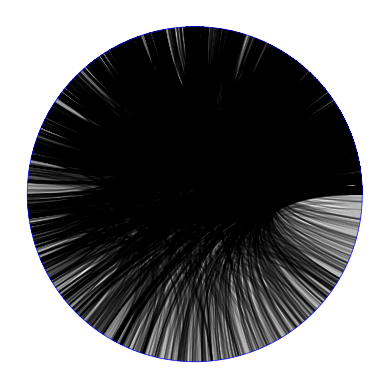

In [ ]:
grafo = nx.read_graphml('air_traffic.graphml')
# Cria uma instância do plot nxviz
plot = nv.CircosPlot(grafo)
print("Number of nodes: ", grafo.number_of_nodes())
print("Number of edges: ", grafo.number_of_edges())
# Exibe o plot
#plot.draw()
#plt.show()

# Plotando o grafo 

Os nós são os aeroportos que estão agrupados por região e estão aos aeroportos que há voo direto.

In [ ]:
#Adicionando o paramêtro Região
aeroportosBR = data[data['country']=='BRASIL']
nosBR = [n for n, attr in grafo.nodes(data=True) if attr.get('country') == 'BRASIL']
subgrafoBR = grafo.subgraph(nosBR)
aeroportosBR.set_index('code', inplace=True)
for node in subgrafoBR.nodes():
  subgrafoBR.nodes[node]['region'] = aeroportosBR.loc[node, 'region']

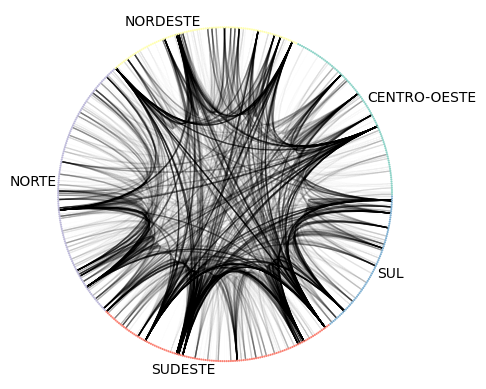

In [ ]:
import networkx as nx
import nxviz as nv
from nxviz import annotate, highlights
import matplotlib.pyplot as plt

# Criar o gráfico Circos
ax = nv.circos(subgrafoBR, 
               group_by="region",
               node_color_by="region",
               edge_alpha_by="flight_count"
)
annotate.circos_group(subgrafoBR, group_by = "region")

# Exibir o gráfico
plt.show()

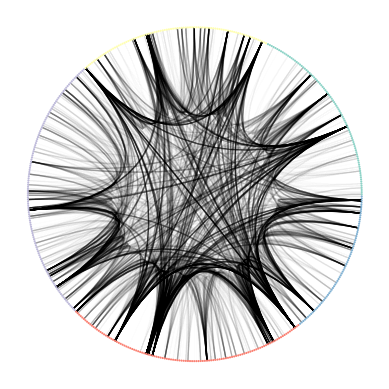

In [ ]:
import networkx as nx
import nxviz as nv
import plotly.graph_objects as go

# Compute the node positions using spring layout with a larger scale
node_positions = nx.spring_layout(subgrafoBR, scale=10)

# Create the Circos plot
ax = nv.circos(subgrafoBR, 
               group_by="region",
               node_color_by="region",
               edge_alpha_by="flight_count"
)

# Create a Plotly figure
fig = go.Figure()

# Add nodes to the Plotly figure
for node, (x, y) in node_positions.items():
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='lines+markers', marker=dict(size=10), name=node))

# Add edges to the Plotly figure
for u, v in subgrafoBR.edges():
    x0, y0 = node_positions[u]
    x1, y1 = node_positions[v]
    fig.add_trace(go.Scatter(x=[x0, x1], y=[y0, y1], mode='lines'))

# Customize the Plotly layout
fig.update_layout(showlegend=False)

# Show the interactive plot
fig.show()


Exemplificando todos os nós.

In [ ]:
import networkx as nx

# Exibir os atributos dos nós
for node, data in subgrafoBR.nodes(data=True):
    print(f"Atributos do nó {node}:")
    for attribute, value in data.items():
        print(f"{attribute}: {value}")
    print()

# Exibir os atributos das arestas
for u, v, data in subgrafoBR.edges(data=True):
    print(f"Atributos da aresta entre {u} e {v}:")
    for attribute, value in data.items():
        print(f"{attribute}: {value}")
    print()

A saída de streaming foi truncada nas últimas 5000 linhas.
flight_count: 2

Atributos da aresta entre SNUH e SBBH:
flight_count: 7

Atributos da aresta entre SNUH e SNOS:
flight_count: 3

Atributos da aresta entre SWLV e SBGR:
flight_count: 1

Atributos da aresta entre SWLV e SBCY:
flight_count: 2

Atributos da aresta entre SNMU e SBGR:
flight_count: 10

Atributos da aresta entre SNMU e SBCV:
flight_count: 12

Atributos da aresta entre SNMU e SNBR:
flight_count: 1

Atributos da aresta entre SNMU e SBKP:
flight_count: 4

Atributos da aresta entre SNMU e SBBH:
flight_count: 3

Atributos da aresta entre SNMU e SBPS:
flight_count: 2

Atributos da aresta entre SNMU e SBRJ:
flight_count: 3

Atributos da aresta entre SNMU e SBSJ:
flight_count: 1

Atributos da aresta entre SNMU e SBSP:
flight_count: 107

Atributos da aresta entre SNMU e SBTC:
flight_count: 2

Atributos da aresta entre SNMU e SBVG:
flight_count: 13

Atributos da aresta entre SNMU e SBVT:
flight_count: 2

Atributos da aresta ent

# Bivariate Analysis

Calculando o grau e a média de vizinhos para cada nó, e criação de um gráfico de dispersão desses valores com uma linha de tendência permitindo uma analise.

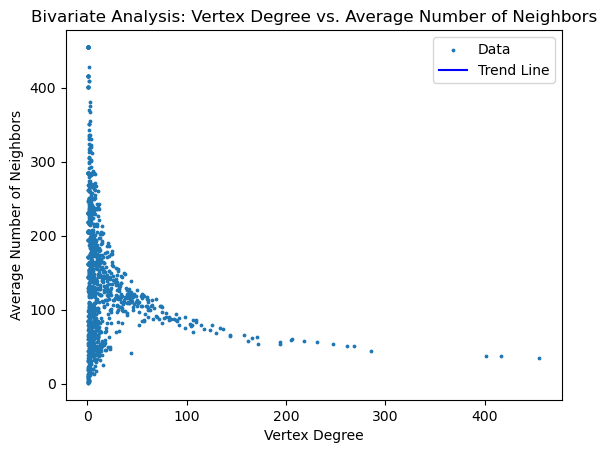

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the graph from the graphml file
graph = nx.read_graphml("air_traffic.graphml")

# Calculate the vertex degree for each node
degrees = dict(graph.degree())

# Calculate the average number of neighbors for each node
avg_neighbors = {node: np.mean([graph.degree(neighbor) for neighbor in graph.neighbors(node)]) for node in graph.nodes()}

# Create a scatter plot of the vertex degree vs. average number of neighbors
plt.scatter(degrees.values(), avg_neighbors.values(), s=3, label="Data")  # Increase the marker size

# Perform linear regression to fit a trend line
slope, intercept, r_value, p_value, std_err = linregress(list(degrees.values()), list(avg_neighbors.values()))
x_values = np.array(list(degrees.values()))
y_values = slope * x_values + intercept

# Add the trend line to the plot
plt.plot(x_values, y_values, color='blue', label="Trend Line")

plt.xlabel("Vertex Degree")
plt.ylabel("Average Number of Neighbors")
plt.title("Bivariate Analysis: Vertex Degree vs. Average Number of Neighbors")
plt.legend()
plt.show()


O código abaixo calcula a média do grau dos vizinhos para cada nó em um subgrafo e cria um gráfico de dispersão com regressão para visualizar a assortatividade de grau. O gráfico mostra a relação entre o grau dos nós e a média do grau dos vizinhos.

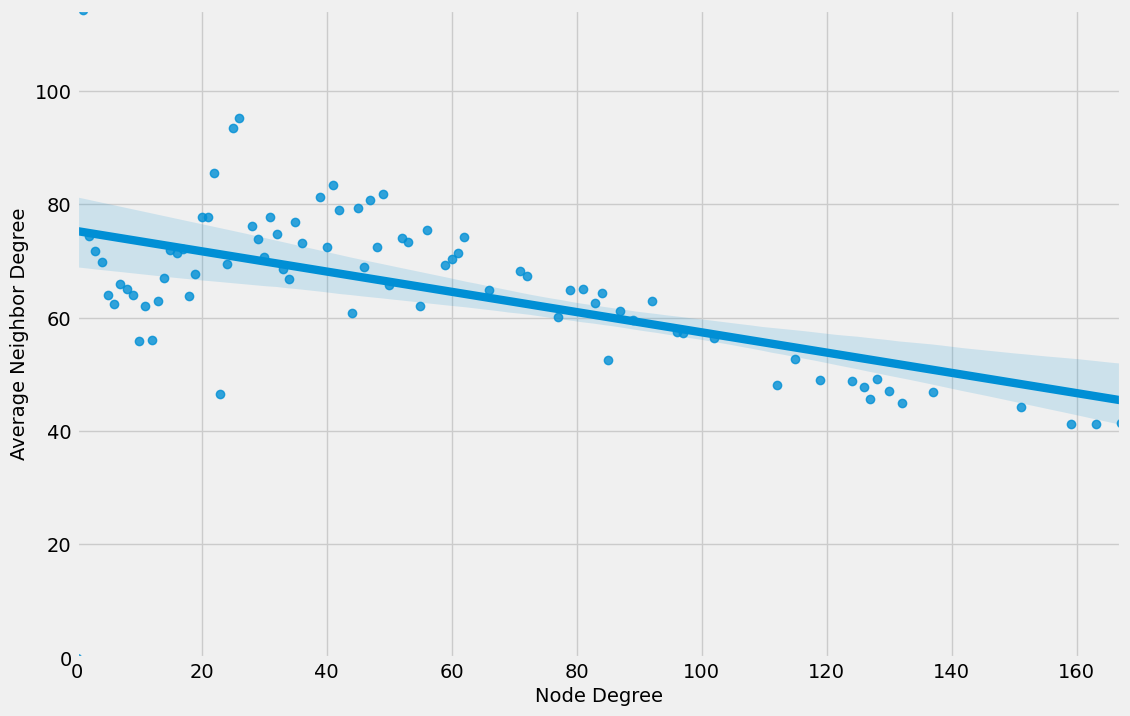

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average degree of neighbors for each node in subgrafBR
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(subgrafoBR).items())

# Convert to lists
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.regplot(x=degree, y=avg_neigh_degree, ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average Neighbor Degree")
ax.set_xlim(0, max(degree))  # Adjust the x-axis limit
ax.set_ylim(0, max(avg_neigh_degree))  # Adjust the y-axis limit

# Save figure
plt.savefig("degree_assortativity.png", format="png", dpi=400, bbox_inches="tight", transparent=True)

plt.show()


Abaixo é criado um DataFrame contendo informações sobre o grau dos nós e o grau médio dos vizinhos em um subgrafo. Em seguida, é gerado um gráfico de dispersão com regressão para visualizar a relação entre essas duas variáveis.

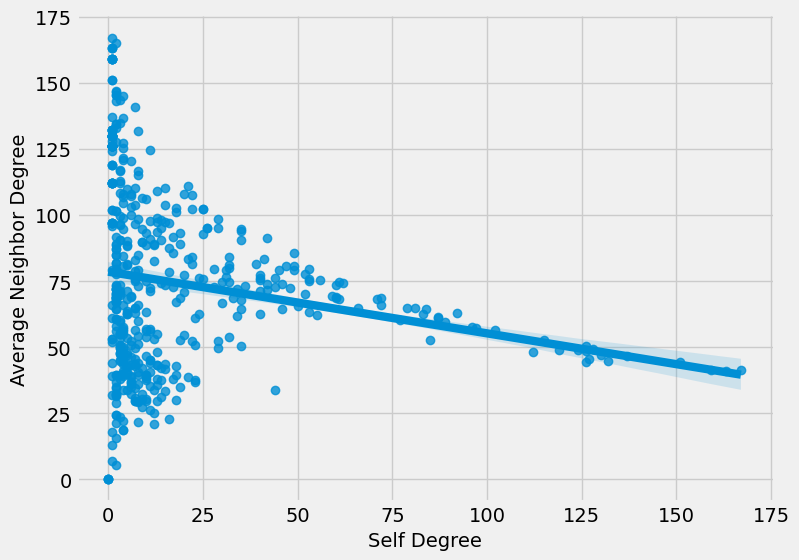

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

network_degrees = pd.DataFrame()
for node_info in zip(list(subgrafoBR.nodes), dict(nx.degree(subgrafoBR)).values(), nx.average_neighbor_degree(subgrafoBR).values()):
    new_line = pd.DataFrame({
        "Self Degree": node_info[1],
        "Average Neighbor Degree": np.round(node_info[2], 2)
    }, index=[node_info[0]])

    network_degrees = pd.concat([
        network_degrees,
        new_line
    ])

fig, ax = plt.subplots(figsize=(8, 6))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax = sns.regplot(data=network_degrees, x="Self Degree", y="Average Neighbor Degree")

plt.show()


O código abaixo cria um DataFrame contendo informações sobre o grau dos nós e o grau médio dos vizinhos em um subgrafo. Em seguida, ele gera um gráfico de dispersão com regressão para visualizar a relação entre essas duas variáveis, com marcadores de dispersão ajustados para terem uma transparência de 0.5.

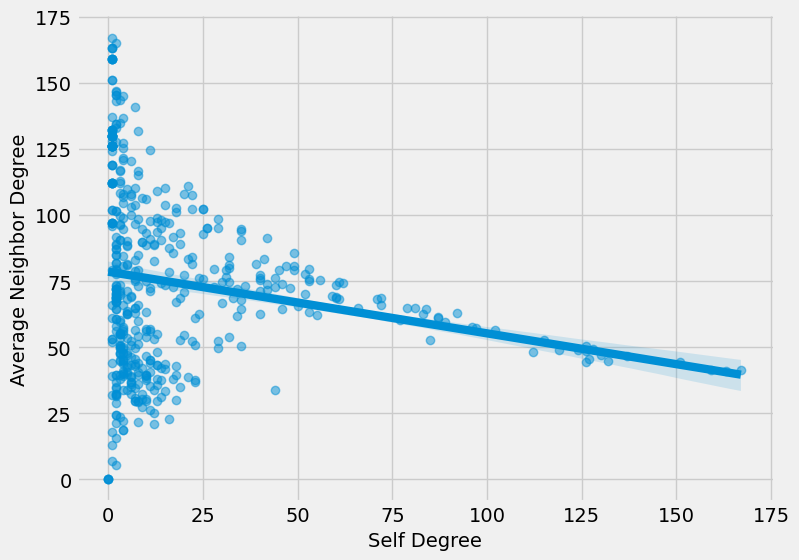

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

network_degrees = pd.DataFrame()
for node_info in zip(list(subgrafoBR.nodes), dict(nx.degree(subgrafoBR)).values(), nx.average_neighbor_degree(subgrafoBR).values()):
    new_line = pd.DataFrame({
        "Self Degree": node_info[1],
        "Average Neighbor Degree": np.round(node_info[2], 2)
    }, index=[node_info[0]])

    network_degrees = pd.concat([
        network_degrees,
        new_line
    ])

fig, ax = plt.subplots(figsize=(8, 6))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

sns.regplot(data=network_degrees, x="Self Degree", y="Average Neighbor Degree", scatter_kws={'alpha':0.5})

plt.show()



REQUERIMENTO 4


##Requerimento 5

In [1]:
if data['Region']==NORDESTE 
print data['Region']

SyntaxError: ignored